In [1]:
import pandas as pd
import joblib
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
easy = joblib.load("../benchmark_v2/tmp.easyinside.jl")
orig = joblib.load("../benchmark_v2/tmp.originside.jl")
hard = joblib.load("../benchmark_v2/tmp.hardinside.jl")
cola = joblib.load("../benchmark_v2/tmp.collapinside.jl")

In [13]:
len(orig), len(hard), len(easy), len(cola)

(54369, 47638, 34140, 39077)

In [14]:
len(orig[['chrom','start']].sort_values(by=['chrom', 'start']).drop_duplicates())

36102

In [15]:
len(hard[['chrom','start']].sort_values(by=['chrom', 'start']).drop_duplicates())

28904

In [16]:
len(cola[['chrom','start']].sort_values(by=['chrom', 'start']).drop_duplicates())

33443

In [32]:
len(easy[['chrom','start']].sort_values(by=['chrom', 'start']).drop_duplicates())

28420

In [23]:
def mksum(df):
    c = df['svtype'].value_counts()
    x = df[['chrom','start', 'svtype']].sort_values(by=['chrom', 'start', 'svtype']).drop_duplicates()
    x = x['svtype'].value_counts()
    return c.loc['INS'], c.loc['DEL'], x.loc['INS'], x.loc['DEL']

In [33]:
o = mksum(orig)
h = mksum(hard)
c = mksum(cola)
e = mksum(easy)

In [37]:
data = pd.DataFrame([o, h, c, e], columns=['INS Count', 'DEL Count', 'INS POS', 'DEL POS'])
data['source'] = ['Original', "Phab", "Collapse", "Phab+Collapse"]

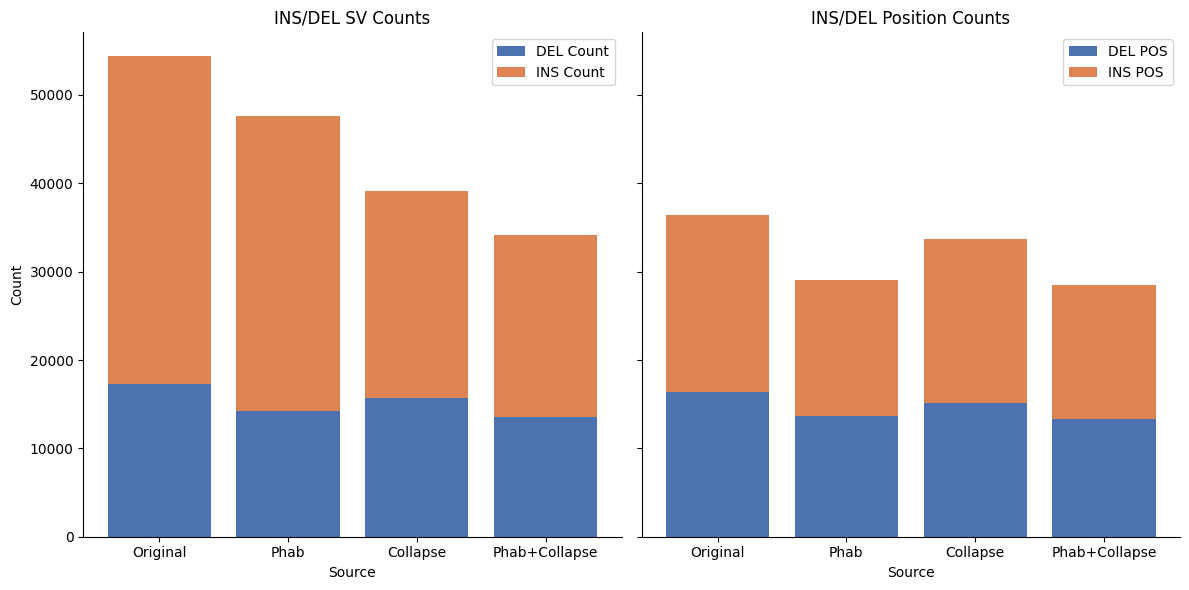

In [38]:
palette = sb.color_palette('deep', n_colors=8) 


# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot 1: Count
axes[0].bar(data['source'], data['DEL Count'], label='DEL Count', color=palette[0])
axes[0].bar(data['source'], data['INS Count'], bottom=data['DEL Count'], label='INS Count', color=palette[1])
axes[0].set_ylabel('Count')
axes[0].set_title('INS/DEL SV Counts')
axes[0].legend()

# Plot 2: POS
axes[1].bar(data['source'], data['DEL POS'], label='DEL POS', color=palette[0])
axes[1].bar(data['source'], data['INS POS'], bottom=data['DEL POS'], label='INS POS', color=palette[1])
axes[1].set_title('INS/DEL Position Counts')
axes[1].legend()

# Aesthetic adjustments
for ax in axes:
    sns.despine(ax=ax)
    ax.set_xlabel('Source')

plt.tight_layout()
plt.show()
